In [21]:
## FIRST TIME PLAYING WITH DATA ##

import os
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "studytime", "traveltime", "failures"]]

predict = "G3"

X = np.array(data.drop([predict], 1)) # drop data for a column
y = np.array(data[predict]) # predicts for the previously droped data

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) #accuracy
print(acc)

print("coefficient: \n", linear.coef_)
print("intercept: \n", linear.intercept_)
print('\n')

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
    


0.8716973722382385
coefficient: 
 [ 0.12911608  0.99388592 -0.19366235  0.10177306 -0.31621987]
intercept: 
 -1.314713130877374




coefficient: 
 [ 0.15780857  0.96658543 -0.25191949  0.04857718 -0.27180128]
intercept: 
 -1.1387178266120515


16.696820984091932 [16 16  1  2  0] 15
15.42973888599031 [16 15  2  1  0] 15
5.781752961982956 [7 7 2 2 2] 9
7.092650913315472 [9 8 1 3 3] 10
9.698537516972072 [10 10  2  2  0] 10
12.3084763870048 [13 12  1  1  0] 12
15.162698929954441 [14 15  2  2  0] 15
5.468001488072223 [8 6 2 1 0] 7
13.27506181505145 [13 13  1  1  0] 12
11.646828839384964 [12 12  3  1  0] 11
6.073436038554005 [7 7 3 2 0] 7
11.519433546068402 [ 8 12  1  1  0] 12
13.180950893522454 [14 13  2  1  0] 13
8.179535929154177 [10  9  4  1  0] 0
9.698537516972072 [10 10  2  2  0] 10
8.731952088925423 [10  9  2  2  0] 9
9.194698537539516 [10 10  4  2  0] 11
15.828787687946125 [14 16  3  1  0] 16
-0.6926619577725458 [7 0 3 2 0] 0
9.965577473007942 [12 10  2  1  0] 11
15.986596256133403 [15 16  3  1  0] 18
12.657230120662511 [14 13  3  1  1] 13
8.731952088925423 [10  9  2  2  0] 9
10.838051979525595 [13 11  3  1  0] 1

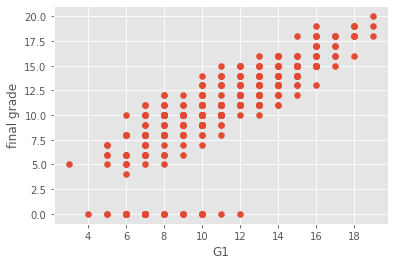

In [36]:
## SAVING MODEL AND PLOTTING DATA ##

import os
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style 

data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "studytime", "traveltime", "failures"]]

predict = "G3"

X = np.array(data.drop([predict], 1)) # drop data for a column
y = np.array(data[predict]) # predicts for the previously droped data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

# best = 0
# for _ in range(50):
#     x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

#     linear = linear_model.LinearRegression()

#     linear.fit(x_train, y_train)
#     acc = linear.score(x_test, y_test) #accuracy
#     print(acc)
    
#     if acc > best:
#         best = acc
#         with open ("studentmodel.pickle", "wb") as f:
#             pickle.dump(linear, f)

# using Pickle to save dataset
with open ("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

# predictions
print("coefficient: \n", linear.coef_)
print("intercept: \n", linear.intercept_)
print('\n')
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
    
# PLOT

p1 = 'G1'
style.use("ggplot")
pyplot.scatter(data[p1], data["G3"])
pyplot.xlabel(p1)
pyplot.ylabel("final grade")
pyplot.show()